# UTILS

In [1]:
# Importing necessary libraries
import numpy as np  
from sklearn import datasets  
from sklearn import preprocessing  
from scipy import spatial  
import matplotlib.pyplot as plt  

# Function to create normalized data and labels
def create_data():
    X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
    # Generates toy data (moon-shaped data points) and labels
    sc = preprocessing.StandardScaler()  # StandardScaler standardizes features by removing the mean and scaling to unit variance
    sc.fit(X)  # Compute the mean and standard deviation to be used for later scaling
    X_norm = sc.transform(X)  # Standardize features by subtracting the mean and scaling to unit variance
    return X_norm, z

# Function to create affinity matrix
def create_affinity_matrix(X):
    tree = spatial.KDTree(X)  # Constructs a KDTree for efficient nearest neighbor search
    dist, idx = tree.query(X, k=16)  # Query the KDTree for nearest neighbors
    idx = idx[:,1:]  # Exclude the first nearest neighbor, which is the point itself
    nb_data, _ = X.shape  # Get the number of data points
    A = np.zeros((nb_data, nb_data))  # Initialize an affinity matrix with zeros
    for i, j in zip(np.arange(nb_data), idx):  # Loop through data points and their nearest neighbors
        A[i, j] = 1  # Assign a value of 1 to indicate an edge between two data points
    A = np.maximum(A.T, A)  # Ensure symmetry by taking element-wise maximum with the transpose of A
    return A

# Function to create constraint matrix
def create_constraint_matrix(z):
    Q = 2 * (np.expand_dims(z, axis=1) == np.expand_dims(z, axis=0)).astype(int) - 1
    # Creates a binary constraint matrix where elements are 1 if the labels are the same and -1 otherwise
    mask = (np.random.rand(*Q.shape) < 0.95).astype(int)  # Generate a random mask with 95% probability
    mask = np.maximum(mask.T, mask)  # Ensure symmetry of the mask
    Q[mask == 1] = 0  # Set elements in Q corresponding to the mask to 0
    Q[np.arange(Q.shape[0]), np.arange(Q.shape[0])] = 1  # Set diagonal elements of Q to 1
    return Q

# Function to show the result
def show_result(X, z):
    plt.scatter(X[:,0], X[:,1], c=z)  # Scatter plot of data points with colors based on labels
    plt.show()  # Display the plot


# SPECTRAL CLUSTERING

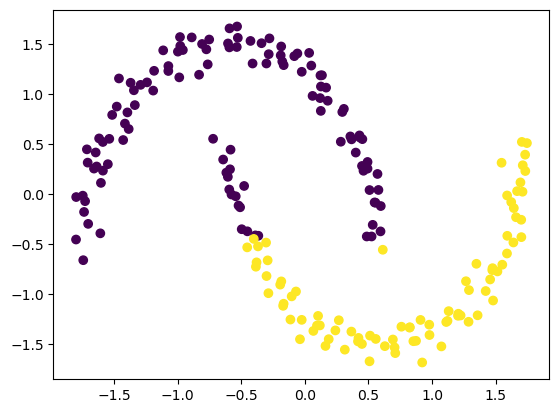

In [2]:
# Import necessary libraries
import numpy as np

# Normalize data and create affinity matrix
X_norm, _ = create_data()
A = create_affinity_matrix(X_norm)

# Create diagonal matrix D
D = np.diag(np.sum(A, axis=1))

# Create Laplacian matrix L
L = D - A

# Compute eigenvalues and eigenvectors of L
eigvals, eigvecs = np.linalg.eig(L)

# Set the second eigenvector as the indicator vector p
n_dim = eigvecs.shape[0]
p = np.zeros(n_dim)
p[eigvecs[:,1] > 0] = 1.0

# Show the result
show_result(X_norm, p)

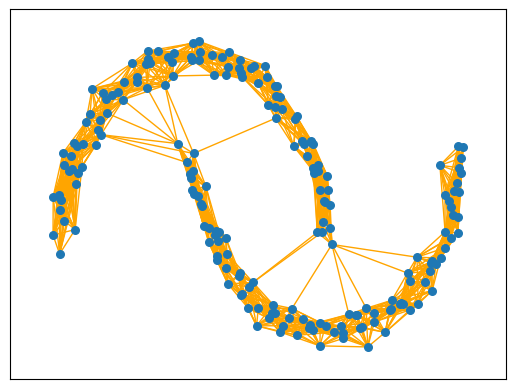

In [3]:
# Import necessary libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Normalize data and create affinity matrix
X_norm, _ = create_data()
A = create_affinity_matrix(X_norm)

# Get the number of data points
nb_data = len(X_norm)

# Create a list of nodes
nodes = np.arange(nb_data)

# Create a dictionary of positions for each node
pos = {i: x for i, x in zip(nodes, X_norm)}

# Create a list of edges
edges = []
for i, e in zip(nodes, A):
    adjacent = nodes[np.where(e==1)]
    for a in adjacent:
        edges.append((i, a))

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the network graph
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=30, edge_color='orange')
plt.show()

In [4]:
# Import necessary libraries
import numpy as np
import scipy as sp

# Normalize data and create affinity matrix
X_norm, z = create_data()  # Call create_data function to get normalized data X_norm and labels z
A = create_affinity_matrix(X_norm)  # Create affinity matrix A based on normalized data X_norm
Q = create_constraint_matrix(z)  # Create constraint matrix Q based on labels z

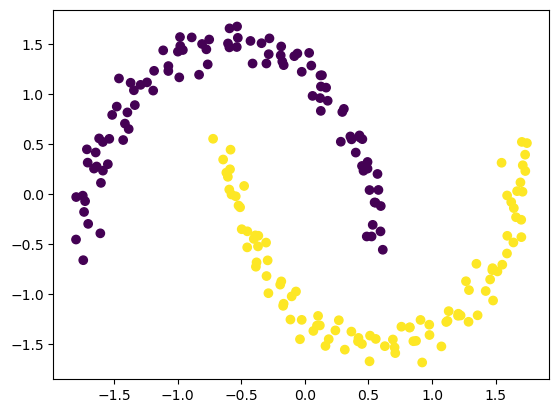

In [29]:
# plot X_norm with z as color
show_result(X_norm, z)

In [33]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

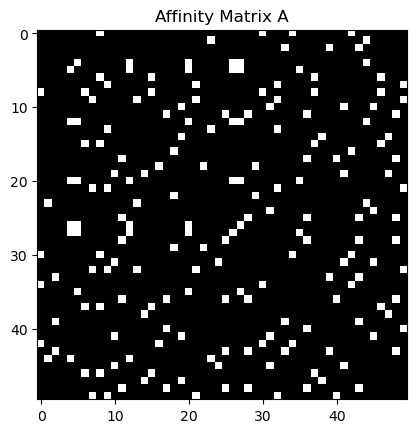

In [58]:
data_points = 50
# plot the matrix A 
plt.imshow(A[:data_points,:data_points], cmap='gray')
plt.title('Affinity Matrix A')
plt.show()

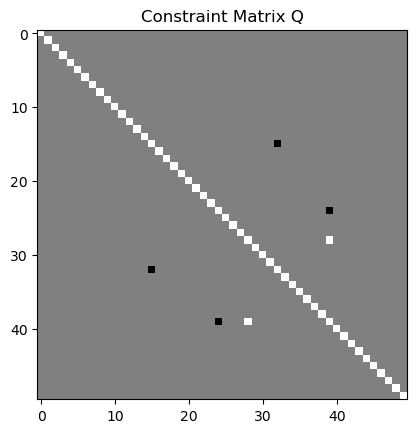

Number of 1 in Q: 252
Number of -1 in Q: 70
Number of -1 in Q: 39678


In [68]:
# plot the matrix Q
plt.imshow(Q[:data_points,:data_points], cmap='gray')
plt.title('Constraint Matrix Q')
plt.show()

# cout number of 0 1 and -1 in Q
unique, counts = np.unique(Q, return_counts=True)
dict(zip(unique, counts))

# display the number of 1 and -1 in Q
print('Number of 1 in Q:', np.sum(Q == 1))
print('Number of -1 in Q:', np.sum(Q == -1))
print('Number of -1 in Q:', np.sum(Q == 0))



In [69]:
# Create diagonal matrix D
D = np.diag(np.sum(A, axis=1))  # Create a diagonal matrix D with row sums of A as diagonal elements

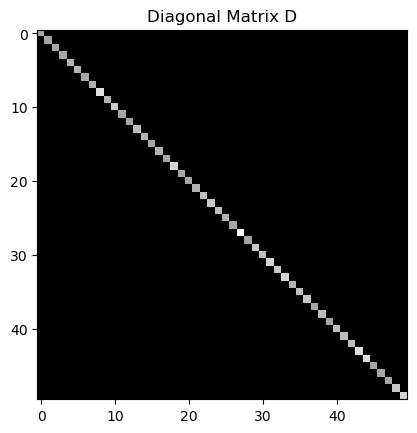

In [70]:
# display the diagonal matrix D
plt.imshow(D[:data_points,:data_points], cmap='gray')
plt.title('Diagonal Matrix D')
plt.show()


In [71]:
vol = np.sum(A)  # Compute the total sum of elements in A (volume)

# Normalize D and create normalized Laplacian matrix L_norm
D_norm = np.linalg.inv(np.sqrt(D))  # Compute the inverse square root of D
L_norm = np.eye(*A.shape) - D_norm.dot(A.dot(D_norm))  # Compute the normalized Laplacian matrix L_norm
Q_norm = D_norm.dot(Q.dot(D_norm))  # Normalize the constraint matrix Q using D_norm

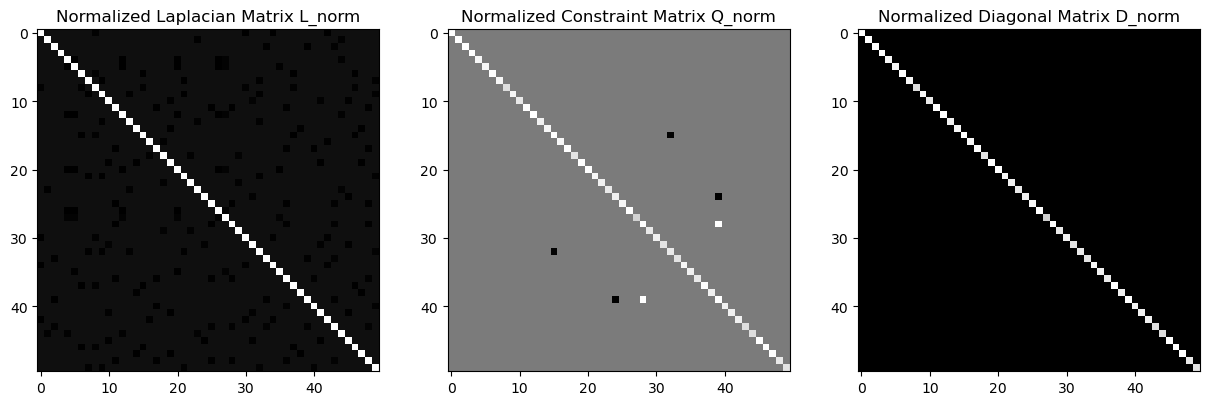

In [73]:
# display the normalized Laplacian matrices L_norm, Q_norm, and D_norm in same plot
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(L_norm[:data_points,:data_points], cmap='gray')
plt.title('Normalized Laplacian Matrix L_norm')
plt.subplot(132)
plt.imshow(Q_norm[:data_points,:data_points], cmap='gray')
plt.title('Normalized Constraint Matrix Q_norm')
plt.subplot(133)
plt.imshow(D_norm[:data_points,:data_points], cmap='gray')
plt.title('Normalized Diagonal Matrix D_norm')
plt.show()

In [74]:
# Compute eigenvalues and eigenvectors of L_norm with constraint Q1
alpha = 0.6 * sp.linalg.svdvals(Q_norm)[0]  # Compute alpha as 0.6 times the largest singular value of Q_norm
Q1 = Q_norm - alpha * np.eye(*Q_norm.shape)  # Apply the constraint by subtracting alpha times identity matrix from Q_norm
val, vec = sp.linalg.eig(L_norm, Q1)  # Compute eigenvalues and eigenvectors of L_norm with constraint Q1

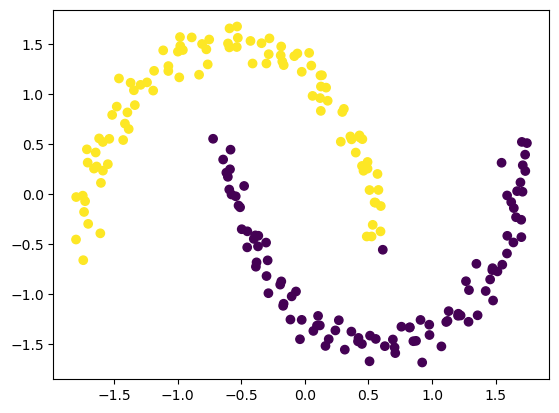

In [80]:
# Select eigenvectors corresponding to non-negative eigenvalues
vec = vec[:, val >= 0]  # Select eigenvectors corresponding to non-negative eigenvalues
vec_norm = (vec / np.linalg.norm(vec, axis=0)) * np.sqrt(vol)  # Normalize the eigenvectors and scale by sqrt(vol)

# Compute costs and select the eigenvector with the minimum cost
costs = np.multiply(vec_norm.T.dot(L_norm), vec_norm.T).sum(axis=1)  # Compute costs based on normalized eigenvectors and L_norm
ids = np.where(costs > 1e-10)[0]  # Find indices where costs are greater than a small threshold
min_idx = np.argmin(costs[ids])  # Find the index of the minimum cost among the selected indices
min_v = vec_norm[:, ids[min_idx]]  # Select the eigenvector corresponding to the minimum cost

# Compute the indicator vector p based on the selected eigenvector
u = D_norm.dot(min_v)  # Compute u by multiplying D_norm with the selected eigenvector min_v
n_dim = u.shape[0]  # Get the number of dimensions of u
p = np.zeros(n_dim)  # Initialize the indicator vector p with zeros
p[u > 0] = 1.0  # Set elements of p to 1.0 where elements of u are greater than 0

# Show the result
show_result(X_norm, p)  # Display the result by calling the show_result function with X_norm and p

c:\Programmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Programmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


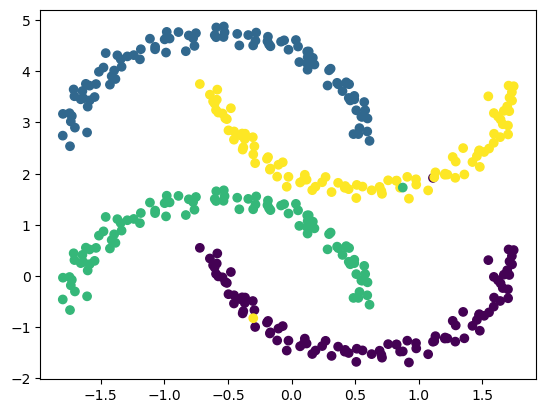

In [81]:
# Import necessary libraries
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans

# Set the number of clusters
K = 4

# Normalize data and create affinity matrix
X_norm, z = create_data()
X_norm = np.concatenate((X_norm, X_norm + (0, 3.2)))
z = np.concatenate((z, z + 2))
A = create_affinity_matrix(X_norm)
Q = create_constraint_matrix(z)

# Create diagonal matrix D
D = np.diag(np.sum(A, axis=1))
vol = np.sum(A)

# Normalize D and create normalized Laplacian matrix L_norm
D_norm = np.linalg.inv(np.sqrt(D))
L_norm = np.eye(*A.shape) - D_norm.dot(A.dot(D_norm))
Q_norm = D_norm.dot(Q.dot(D_norm))

# Set alpha as a fraction of the K-th eigenvalue of Q_norm
alpha = 0.6 * sp.linalg.svdvals(Q_norm)[K]
Q1 = Q_norm - alpha * np.eye(*Q_norm.shape)

# Compute eigenvalues and eigenvectors of L_norm with constraint Q1
val, vec = sp.linalg.eig(L_norm, Q1)

# Select eigenvectors corresponding to non-negative eigenvalues
vec = vec[:, val >= 0]
vec_norm = (vec / np.linalg.norm(vec, axis=0)) * np.sqrt(vol)

# Compute costs and select the K eigenvectors with the minimum costs
costs = np.multiply(vec_norm.T.dot(L_norm), vec_norm.T).sum(axis=1)
ids = np.where(costs > 1e-10)[0]
min_idx = np.argsort(costs[ids])[0:K]
min_v = vec_norm[:, ids[min_idx]]

# Compute the indicator vector u based on the selected eigenvectors
u = D_norm.dot(min_v)

# Apply K-means clustering on the indicator vector u
model = KMeans(n_clusters=K).fit(u)
labels = model.labels_

# Show the result
show_result(X_norm, labels)